# Рівномірний розподіл. IID процеси. Середнє,
# дисперсія, коефіцієнти ексцесу та асиметрії. Характеристична
# функція. Центральна гранична теорема

## Task 1

Випадковий процес: [14.83372465 15.19424842  6.47030267 ...  4.78681446 14.41615812
  8.12039345]


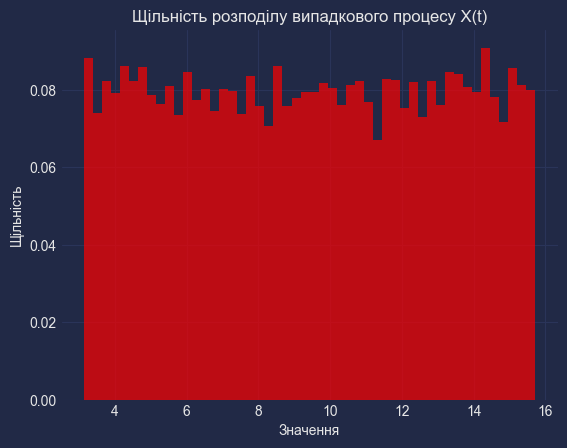

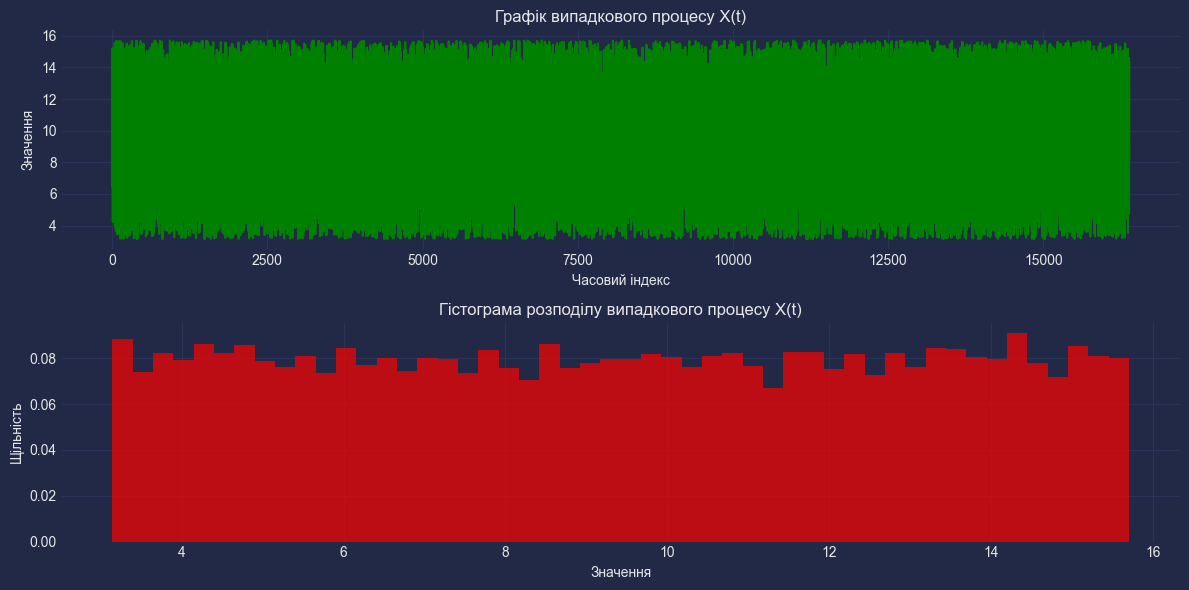

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk

def generate_and_plot_random_process():
    plt.style.use("cyberpunk")
    
    a = np.pi
    b = 5 * np.pi
    N = 2**14
    t = np.arange(1, N + 1)

    X_t = np.random.uniform(a, b, N)
    print(f'Випадковий процес: {X_t}')
    # Побудувати гістограму щільності розподілу
    plt.hist(X_t, bins=50, density=True, alpha=0.7, color='red')
    plt.title('Щільність розподілу випадкового процесу X(t)')
    plt.xlabel('Значення')
    plt.ylabel('Щільність')
    plt.show()

    # Побудувати графік випадкового процесу та гістограму розподілу
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(t, X_t, color='green') 
    plt.title('Графік випадкового процесу X(t)')
    plt.xlabel('Часовий індекс')
    plt.ylabel('Значення')

    plt.subplot(2, 1, 2)
    plt.hist(X_t, bins=50, density=True, alpha=0.7, color='red')
    plt.title('Гістограма розподілу випадкового процесу X(t)')
    plt.xlabel('Значення')
    plt.ylabel('Щільність')

    plt.tight_layout()
    plt.show()

# Викликати функцію
generate_and_plot_random_process()


Interval 1: <x> = 4.3194042497573735, σ**2 = 0.458588236651417
Interval 2: <x> = 6.673757385899025, σ**2 = 0.4591599348600485
Interval 3: <x> = 9.030031347397122, σ**2 = 0.4622471238680714
Interval 4: <x> = 11.385851313132394, σ**2 = 0.46413871184043604
Interval 5: <x> = 13.742449132942124, σ**2 = 0.46392103940491464
Interval 6: <x> = 16.110693481209214, σ**2 = 0.46793545376079543
Interval 7: <x> = 18.454851548679738, σ**2 = 0.46358145784816895
Interval 8: <x> = 20.815103816769998, σ**2 = 0.4547898682278593
╒════════════╤══════════╤══════════╕
│   Interval │      <x> │     σ**2 │
╞════════════╪══════════╪══════════╡
│          1 │  4.3194  │ 0.458588 │
├────────────┼──────────┼──────────┤
│          2 │  6.67376 │ 0.45916  │
├────────────┼──────────┼──────────┤
│          3 │  9.03003 │ 0.462247 │
├────────────┼──────────┼──────────┤
│          4 │ 11.3859  │ 0.464139 │
├────────────┼──────────┼──────────┤
│          5 │ 13.7424  │ 0.463921 │
├────────────┼──────────┼──────────┤
│     

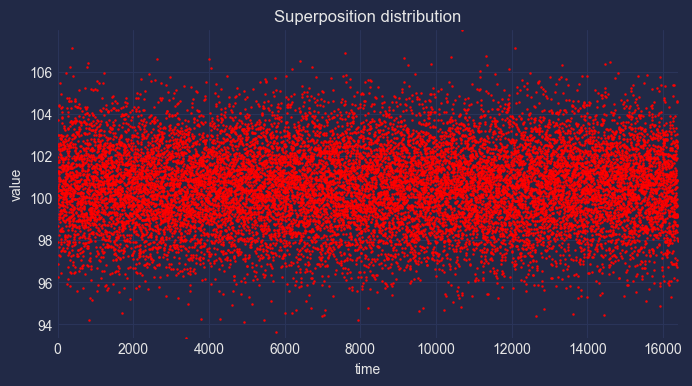

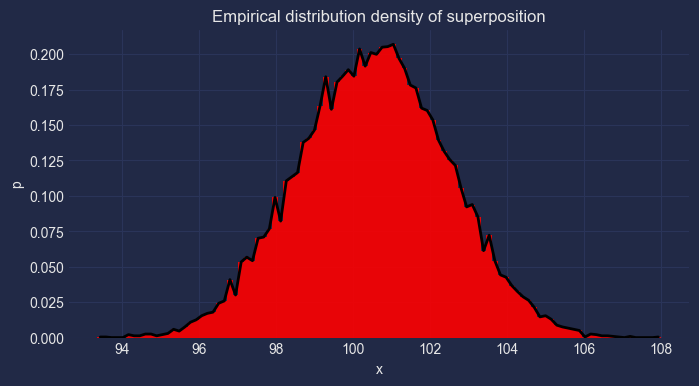

moment 1: 20.788806385109037
moment 2: 432.27139938787167
moment 3: 8990.436106073323
moment 4: 187026.1089559023
central moment 1: 8.899621220092441e-13
central moment 2: 0.09692847030289191
central moment 3: -0.0003760263305929523
central moment 4: 0.02684934814819381
cumulant 1: 20.788806385109037
cumulant 2: 0.09692847030289191
cumulant 3: -0.0003760263305929523
cumulant 4: -0.0013360369175819883
normed cumulant 1: 66.77345913952
normed cumulant 2: 1.0
normed cumulant 3: -0.012460664943966374
normed cumulant 4: -0.14220528629970106


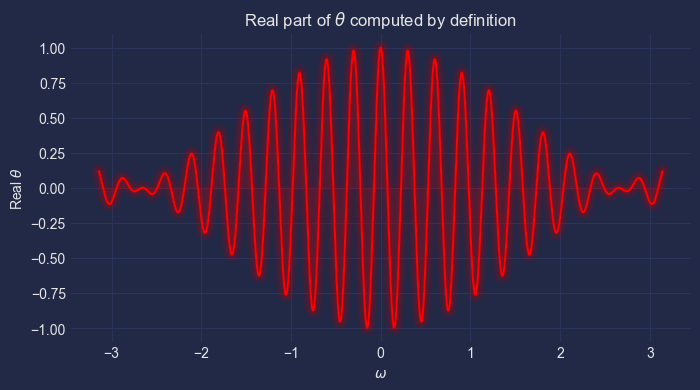

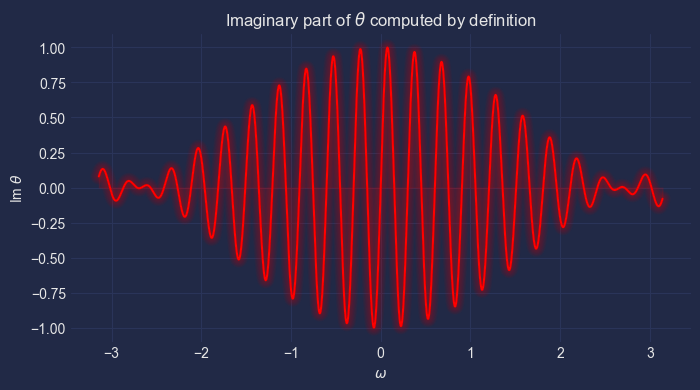

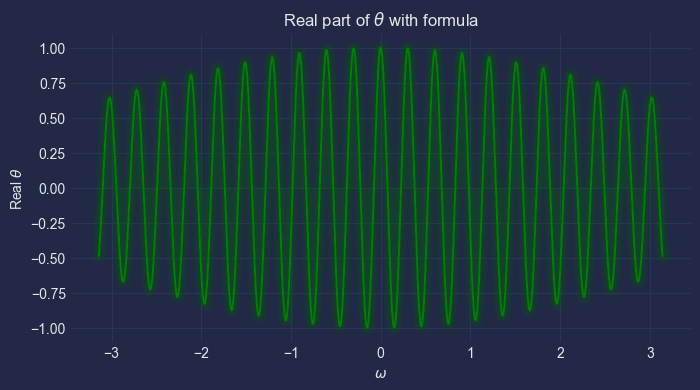

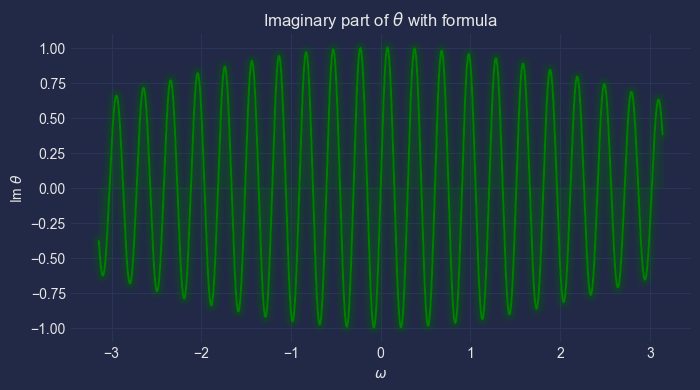

Moments, Central Moments, Cumulants, Normed Cumulants:
╒══════════╤═════════╕
│  Moment  │  Value  │
╞══════════╪═════════╡
│ moment 1 │ 20.7888 │
├──────────┼─────────┤
│ moment 2 │ 432.271 │
├──────────┼─────────┤
│ moment 3 │ 8990.44 │
├──────────┼─────────┤
│ moment 4 │ 187026  │
╘══════════╧═════════╛
╒══════════════════╤══════════════╕
│  Central Moment  │    Value     │
╞══════════════════╪══════════════╡
│        µ1        │ 8.89962e-13  │
├──────────────────┼──────────────┤
│        µ2        │  0.0969285   │
├──────────────────┼──────────────┤
│        µ3        │ -0.000376026 │
├──────────────────┼──────────────┤
│        µ4        │  0.0268493   │
╘══════════════════╧══════════════╛
╒════════════╤══════════════╕
│  Cumulant  │    Value     │
╞════════════╪══════════════╡
│     k1     │   20.7888    │
├────────────┼──────────────┤
│     k2     │  0.0969285   │
├────────────┼──────────────┤
│     k3     │ -0.000376026 │
├────────────┼──────────────┤
│     k4     │ -0.00133604

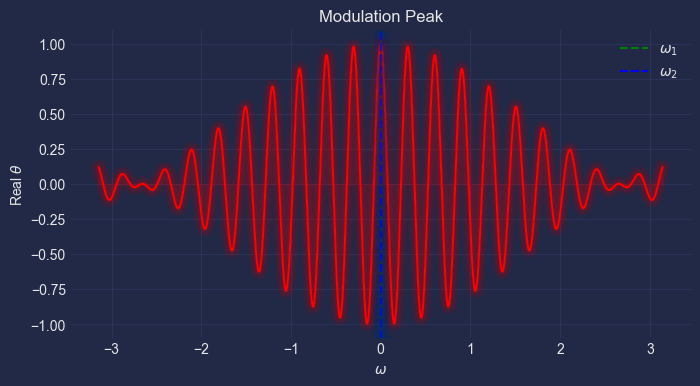

Experimental Peak Width (∆ω): 3.0554957955098168


In [6]:
from tabulate import tabulate

def generate_processes(inter, N, N1):
    sect = []
    a = (inter[1] - inter[0]) / N1
    b = inter[0]
    for i in range(N1):
        l = [b, b + a]
        sect.append(l)
        b = b + a
    
    un = {}
    mean = {}
    var = {}
    
    for j in range(N1):
        un['u_%s' % (j+1)] = np.random.rand(N) * (sect[j][1] - sect[j][0]) + sect[j][0]
        p, x_edges = np.histogram(un['u_%s' % (j+1)], 100, density=True)
        x_mean = (x_edges[:-1] + x_edges[1:]) / 2
        d = x_edges[1] - x_edges[0]
        mean['m_%s' % (j+1)] = np.sum(x_mean * p * d)
        var['u_%s' % (j+1)] = np.sum((x_mean - mean['m_%s' % (j+1)])**2 * p * d)
        print(f"Interval {j+1}: <x> = {mean['m_%s' % (j+1)]}, σ**2 = {var['u_%s' % (j+1)]}")
    
    superpos = np.sum([un['u_%s' % (k+1)] for k in range(N1)], axis=0)
    emp_var = np.sum([var['u_%s' % (k+1)] for k in range(N1)])
    
    # Таблиця
    headers = ["Interval", "<x>", "σ**2"]
    table_data = [[j+1, mean['m_%s' % (j+1)], var['u_%s' % (j+1)]] for j in range(N1)]
    print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))
    
    return superpos, x_mean, emp_var


def print_moments(m):
    headers = ["Moment", "Value"]
    table_data = [[f"moment {i+1}", m[i]] for i in range(4)]
    print(tabulate(table_data, headers=headers, tablefmt="fancy_grid", numalign="center", stralign="center"))

def print_central_moments(mu):
    headers = ["Central Moment", "Value"]
    table_data = [[f"µ{i+1}", mu[i]] for i in range(4)]
    print(tabulate(table_data, headers=headers, tablefmt="fancy_grid", numalign="center", stralign="center"))

def print_cumulants(k):
    headers = ["Cumulant", "Value"]
    table_data = [[f"k{i+1}", k[i]] for i in range(4)]
    print(tabulate(table_data, headers=headers, tablefmt="fancy_grid", numalign="center", stralign="center"))

def print_normed_cumulants(kn):
    headers = ["Normed Cumulant", "Value"]
    table_data = [[f"k{i+1}/σ^{i+1}", kn[i]] for i in range(4)]
    print(tabulate(table_data, headers=headers, tablefmt="fancy_grid", numalign="center", stralign="center"))

def skewness_and_kurtosis(x_mean, p, d, m0, sigma):
    skewness = np.sum(((x_mean - m0) / sigma)**3 * p * d)
    kurtosis = np.sum(((x_mean - m0) / sigma)**4 * p * d) - 3  # віднімаємо 3 для отримання ексцесу
    print(f"Pearson's Skewness (γ1): {skewness}")
    print(f"Fisher's Kurtosis (γ2): {kurtosis}")
    return skewness, kurtosis

def plot_superposition(superpos):
    plt.figure(figsize=(8, 4))
    plt.plot(range(len(superpos)), superpos, 'ro', markersize=0.8)
    plt.axis([0, len(superpos), min(superpos), max(superpos)])
    plt.xlabel('time')
    plt.ylabel('value')
    plt.title('Superposition distribution')
    plt.show()

def plot_empirical_distribution(superpos, x_mean):
    plt.figure(figsize=(8, 4))
    p, x_edges, _ = plt.hist(superpos, 100, color='r', density=True, alpha=0.9)
    x_mean = (x_edges[:-1] + x_edges[1:]) / 2
    d = x_edges[1] - x_edges[0]
    plt.plot(x_mean, p, 'k-', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('p')
    plt.title('Empirical distribution density of superposition')
    plt.show()

def compute_moments(x_mean, p, d):
    m = np.zeros(4)
    for i in range(1, 5):
        m[i-1] = np.sum(x_mean**i * p * d)
        print(f"moment {i}: {m[i-1]}")
    return m

def compute_central_moments(x_mean, p, d, m0):
    mu = np.zeros(4)
    for i in range(1, 5):
        mu[i-1] = np.sum((x_mean - m0)**i * p * d)
        print(f"central moment {i}: {mu[i-1]}")
    return mu

def compute_cumulants(m, mu):
    k = np.array([m[0], mu[1], mu[2], mu[3] - 3 * mu[1]**2])
    for j in range(4):
        print(f"cumulant {j+1}: {k[j]}")
    return k

def compute_normed_cumulants(k, sigma):
    kn = k / (sigma**(np.arange(4) + 1))
    for i in range(4):
        print(f"normed cumulant {i+1}: {kn[i]}")
    return kn

def characteristic_function(x_mean):
    A = 5000
    omega = np.linspace(-np.pi, np.pi, A)
    theta_r = np.zeros(A)
    theta_im = np.zeros(A)

    for i in range(A):
        theta_r[i] = np.sum(np.cos(omega[i] * x_mean)) / len(x_mean)
        theta_im[i] = np.sum(np.sin(omega[i] * x_mean)) / len(x_mean)

    return omega, theta_r, theta_im

def plot_real_part_of_theta(omega, theta_r):
    plt.figure(figsize=(8, 4))
    plt.plot(omega, theta_r, 'r-')
    plt.xlabel('$\omega$')
    plt.ylabel('Real $\\theta$')
    plt.title('Real part of $\\theta$ computed by definition')
    plt.grid(True)
    mplcyberpunk.add_glow_effects()
    plt.show()

def plot_imaginary_part_of_theta(omega, theta_im):
    plt.figure(figsize=(8, 4))
    plt.plot(omega, theta_im, 'r-')
    plt.xlabel('$\omega$')
    plt.ylabel('Im $\\theta$')
    plt.title('Imaginary part of $\\theta$ computed by definition')
    plt.grid(True)
    mplcyberpunk.add_glow_effects()
    plt.show()

def plot_real_part_of_theta_with_formula(omega, sigma, m0):
    R = np.exp(-0.5 * sigma**2 * omega**2) * np.cos(m0 * omega)
    plt.figure(figsize=(8, 4))
    plt.plot(omega, R, 'g-')
    plt.xlabel('$\omega$')
    plt.ylabel('Real $\\theta$')
    plt.title('Real part of $\\theta$ with formula')
    plt.grid(True)
    mplcyberpunk.add_glow_effects()
    plt.show()

def plot_imaginary_part_of_theta_with_formula(omega, sigma, m0):
    I = np.exp(-0.5 * sigma**2 * omega**2) * np.sin(m0 * omega)
    plt.figure(figsize=(8, 4))
    plt.plot(omega, I, 'g-')
    plt.xlabel('$\omega$')
    plt.ylabel('Im $\\theta$')
    plt.title('Imaginary part of $\\theta$ with formula')
    plt.grid(True)
    mplcyberpunk.add_glow_effects()
    plt.show()


def find_modulation_frequency(omega, theta_r):
    # Знаходимо індекси максимумів функції theta_r
    max_indices = np.where(theta_r == max(theta_r))[0]
    omega1 = omega[max_indices[0]]
    omega2 = omega[max_indices[1]]

    # Частота модуляції
    nu = 2 * np.pi / (omega2 - omega1)

    print(f"Experimental Modulation Frequency (ν): {nu}")

    return omega1, omega2, nu


def plot_modulation_peak(omega, theta_r, omega1, omega2):
    plt.figure(figsize=(8, 4))
    plt.plot(omega, theta_r, 'r-')
    plt.axvline(x=omega1, color='g', linestyle='--', label='$\omega_1$')
    plt.axvline(x=omega2, color='b', linestyle='--', label='$\omega_2$')
    plt.xlabel('$\omega$')
    plt.ylabel('Real $\\theta$')
    plt.title('Modulation Peak')
    plt.legend()
    plt.grid(True)
    mplcyberpunk.add_glow_effects()
    plt.show()


def find_peak_width(omega, theta_r, omega1, omega2):
    # Знаходимо висоту піка
    peak_height = max(theta_r)

    # Знаходимо індекси, де значення перетинає половину висоти піка
    half_max_indices = np.where(theta_r >= peak_height / 2)[0]
    omega_half_max1 = omega[half_max_indices[0]]
    omega_half_max2 = omega[half_max_indices[-1]]

    # Ширина на половині висоти (FWHM)
    delta_omega = omega_half_max2 - omega_half_max1

    print(f"Experimental Peak Width (∆ω): {delta_omega}")

    return delta_omega

# Main
inter = [np.pi, 7*np.pi]
N = 2**14
N1 = 8

superpos, x_mean, emp_var = generate_processes(inter, N, N1)

plot_superposition(superpos)
plot_empirical_distribution(superpos, x_mean)

p, x_edges = np.histogram(superpos, 100, density=True)
d = x_edges[1] - x_edges[0]
m0 = np.sum(x_mean * p * d)

m = compute_moments(x_mean, p, d)
mu = compute_central_moments(x_mean, p, d, m0)
k = compute_cumulants(m, mu)
sigma = np.sqrt(mu[1])
kn = compute_normed_cumulants(k, sigma)

omega, theta_r, theta_im = characteristic_function(x_mean)

plot_real_part_of_theta(omega, theta_r)
plot_imaginary_part_of_theta(omega, theta_im)
plot_real_part_of_theta_with_formula(omega, sigma, m0)
plot_imaginary_part_of_theta_with_formula(omega, sigma, m0)
# Вивід результатів у вигляді гарної таблиці
print("Moments, Central Moments, Cumulants, Normed Cumulants:")
print_moments(m)
print_central_moments(mu)
print_cumulants(k)
print_normed_cumulants(kn)

# Обчислення та вивід коефіцієнта асиметрії та ексцесу
skew, kurt = skewness_and_kurtosis(x_mean, p, d, m0, sigma)
omega1, omega2, nu = find_modulation_frequency(omega, theta_r)
plot_modulation_peak(omega, theta_r, omega1, omega2)
delta_omega = find_peak_width(omega, theta_r, omega1, omega2)